# This is The Q Matrix of the counts of transitions per year 

In [34]:
import numpy as np
Q = np.mat("0 0.121 0.1864 0.337 0.0631 0.158; 0.148 0 0.3739 0.1349 0.0632 0.1582; 0.1461 0.2398 0 0.1333 0.4073 0.1558; 0.3692 0.1209 0.1863 0 0.0947 0.2368; 0.1468 0.1203 1.2085 0.201 0 0.2359; 0.1471 0.1205 0.185 0.2012 0.0944 0")

# This is the function we THINK is giving us the EXPECTED number of transitions in a given time 

In [123]:
def expected_number_of_transitions_in_time_t(t, Q):  
    m= Q.shape[0]
    eigenvalue,eigenvector = np.linalg.eig(Q)
    eigenvector_inv = np.linalg.inv(eigenvector)
    E_n = np.zeros((m,m))
    for i in range(m):
        d_i=eigenvalue[i]
        E_i = np.zeros((m,m))
        E_i[i,i]=1


        S_i = eigenvector*E_i*eigenvector_inv
        
        for j in range(m):
            d_j=eigenvalue[j]
            E_j = np.zeros((m,m))
            E_j[j,j]=1
            S_j= eigenvector*E_j*eigenvector_inv
           
            if d_i == d_j:
                I_ij = t*np.exp(d_i*t)
            else: 
                I_ij = (np.exp(d_i*t)-np.exp(d_j*t))/(d_i - d_j)

            N_greek=S_i*Q*S_j*I_ij
            E_n += N_greek
         
    return E_n

In [122]:
expected_number_of_transitions_in_time_t(1, Q)

array([[0.29671631, 0.32216739, 0.60292535, 0.53928089, 0.29240695,
        0.4015138 ],
       [0.39390026, 0.23894032, 0.77472723, 0.39165344, 0.34720075,
        0.39666954],
       [0.47266168, 0.49686286, 0.88455883, 0.48446971, 0.66095034,
        0.49744687],
       [0.59084211, 0.35101495, 0.67711223, 0.34118033, 0.34100175,
        0.48440126],
       [0.68017038, 0.66072331, 1.96112697, 0.72391751, 0.7265436 ,
        0.75363261],
       [0.37379798, 0.30209813, 0.59069936, 0.41158173, 0.30160222,
        0.2338341 ]])

# This is the number of expected transitons from i to ANY j 

In [127]:
print(np.sum(a=expected_number_of_transitions_in_time_t(1,Q), axis=1))

[2.45501069 2.54309154 3.49695029 2.78555263 5.50611439 2.21361353]


# This is the number of transitons from i to ANY j 

In [90]:
np.sum(a = Q, axis=1)
print(np.sum(a = Q, axis=1))

[[0.8655]
 [0.8782]
 [1.0823]
 [1.0079]
 [1.9125]
 [0.7482]]


# This is the Simulation to show that the code that computes the expected number of transitions in a given time up above is correct.  

In [120]:
events_in_trial_a=[]
for trials in range(1000):
    events=sum(np.random.exponential(1/0.8655, size= 1) < 1.0)
    events_in_trial_a.append(events)
print("Number of transitions from A to any state before time 1: " + str(sum(events_in_trial_a)/1000))  
events_in_trial_b=[]
for trials in range(1000):
    events=sum(np.random.exponential(1/0.8782, size= 1) < 1.0)
    events_in_trial_b.append(events)
print("Number of transitions from B to any state before time 1: " + str(sum(events_in_trial_b)/1000))
    
events_in_trial_c=[]
for trials in range(1000):
    events=sum(np.random.exponential(1/1.0823, size= 1) < 1.0)
    events_in_trial_c.append(events)
print("Number of transitions from C to any state before time 1: " + str(sum(events_in_trial_c)/1000)) 

events_in_trial_d=[]
for trials in range(1000):
    events=sum(np.random.exponential(1/1.0079, size= 1) < 1.0)
    events_in_trial_d.append(events)
print("Number of transitions from D to any state before time 1: " + str(sum(events_in_trial_d)/1000))
    
events_in_trial_e=[]
for trials in range(1000):
    events=sum(np.random.exponential(1/1.9125, size= 1) < 1.0)
    events_in_trial_e.append(events)
print("Number of transitions from E to any state before time 1: " + str(sum(events_in_trial_e)/1000))
    
events_in_trial_f=[]
for trials in range(1000):
    events=sum(np.random.exponential(1/0.7482, size= 1) < 1.0)
    events_in_trial_f.append(events)
print("Number of transitions from F to any state before time 1: " + str(sum(events_in_trial_f)/1000))

Number of transitions from A to any state before time 1: 0.591
Number of transitions from B to any state before time 1: 0.586
Number of transitions from C to any state before time 1: 0.648
Number of transitions from D to any state before time 1: 0.655
Number of transitions from E to any state before time 1: 0.857
Number of transitions from F to any state before time 1: 0.509


# Below is a histogram of the distibution of the random exponential times for an event to occur for starting state A. other random samples from the other starting states produce similar state.  
## other random samples of time from the other starting states produce similar state.  

(array([464., 248., 118.,  73.,  50.,  25.,  11.,   6.,   1.,   4.]),
 array([5.76600486e-04, 7.11372854e-01, 1.42216911e+00, 2.13296536e+00,
        2.84376161e+00, 3.55455787e+00, 4.26535412e+00, 4.97615037e+00,
        5.68694663e+00, 6.39774288e+00, 7.10853913e+00]),
 <a list of 10 Patch objects>)

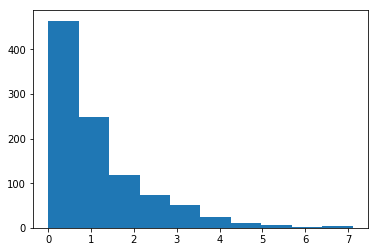

In [107]:
import matplotlib.pyplot as plt
np.mean(events_in_trial_a)
plt.hist(np.random.exponential(1/0.8655, size= 1000))